In [2]:
import pandas as pd

In [8]:
data = pd.read_csv("../models/magym_PredPrey/TEST_analyse_comm_logs/run4/logs/comm_logs.csv")

In [9]:
data = data.fillna("")
data.head()

### Number of different sentences generated

In [53]:
sent_occ = pd.DataFrame(columns=["Sentences", "Perfect N#", "Generated N#"])

sent_occ["Sentences"] = pd.unique(data[["Perfect Message", "Generated Message"]].values.ravel('K'))

for s in pd.unique(data[["Perfect Message", "Generated Message"]].values.ravel('K')):
    sent_occ.loc[sent_occ["Sentences"] == s, "Perfect N#"] = len(data[data["Perfect Message"] == s])
    sent_occ.loc[sent_occ["Sentences"] == s, "Generated N#"] = len(data[data["Generated Message"] == s])
    
sent_occ = sent_occ.sort_values(["Perfect N#", "Generated N#"])#, ascending=[False, False])
sent_occ

,Sentences,Perfect N#,Generated N#
89,East East,0,1
95,North South North East,0,1
101,Observed Prey South Located East,0,1
114,Located South South West,0,1
116,Prey North Located South,0,1
...,...,...,...
4,Prey Located West,2864,3
22,Prey Located North East,3328,2115
5,Prey Located Center,3964,6444
0,Prey Located North,5061,1986


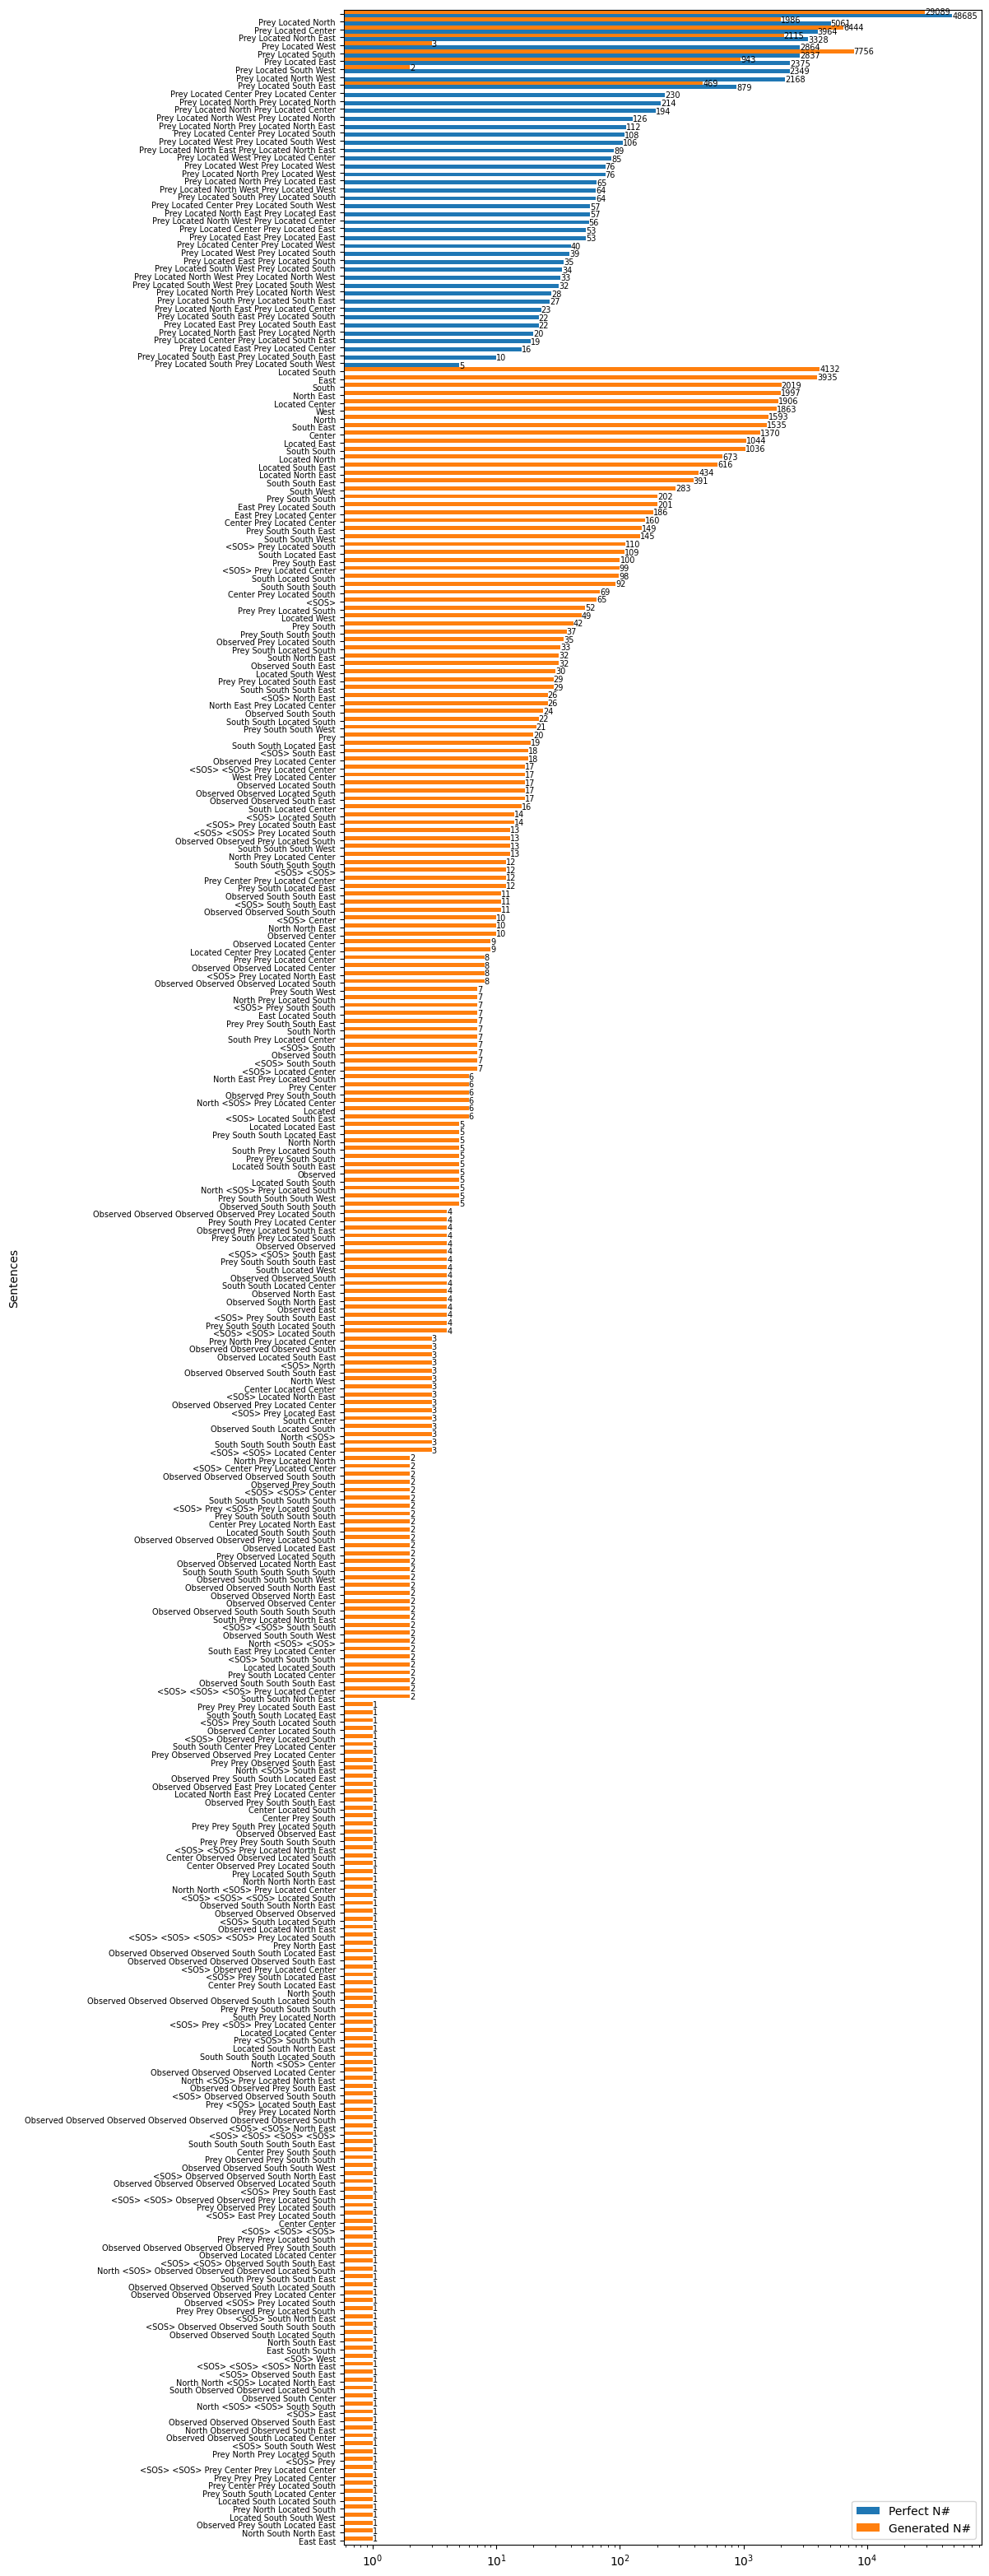

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 40))

sent_occ.plot(x="Sentences", y=["Perfect N#", "Generated N#"], kind="barh", ax=ax, width=1)

for container in ax.containers:
    ax.bar_label(container, fontsize=7)

plt.yticks(fontsize=7)
plt.ylim(-0.5,len(sent_occ)-.5)

ax.set_xscale('log')

# Token-level

In [ ]:
lang_columns = ["Generated Message", "Perfect Message", "Broadcasted Message"]
for c in lang_columns:
    data[c] = data[c].apply(lambda x: x.split(" "))
data.head()